In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\dataset\\Black Friday\\train.csv")
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [188]:
df.shape

(550068, 12)

In [189]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [190]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


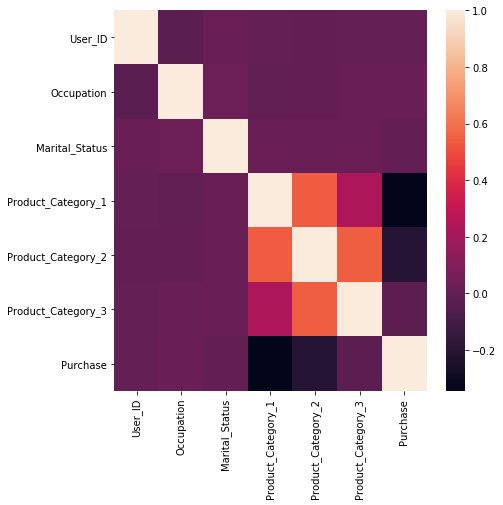

In [191]:
sns.heatmap(df.corr())

In [192]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

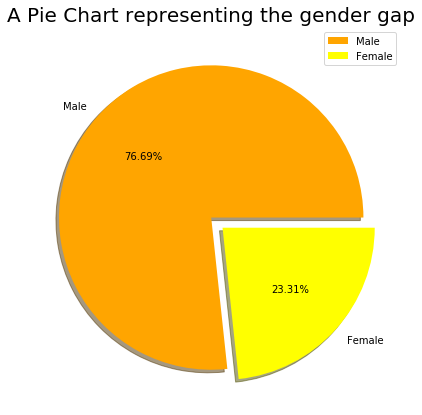

In [193]:
df['Gender'].value_counts()
# pie chart 

size = [405380, 123197]
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()


In [194]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [195]:
# finding the maximum purchase in both male and female

df.groupby(df.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [196]:
# finding the minimum purchase in both male and female

df.groupby(df.Gender).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [197]:
# checking dependency of gender on purchase

df[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


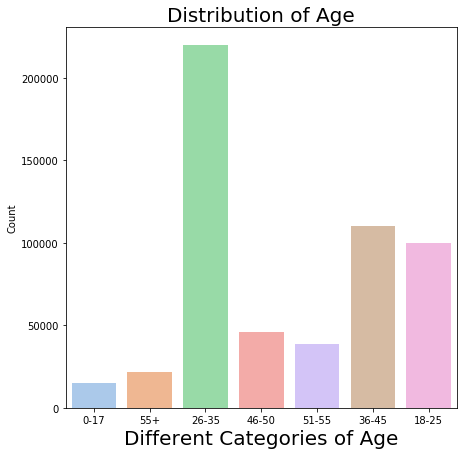

In [198]:
## visualizing the age of customers
sns.countplot(df['Age'], palette = 'pastel')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [199]:
# checing the dependency of age attribute with purchasing power
df[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


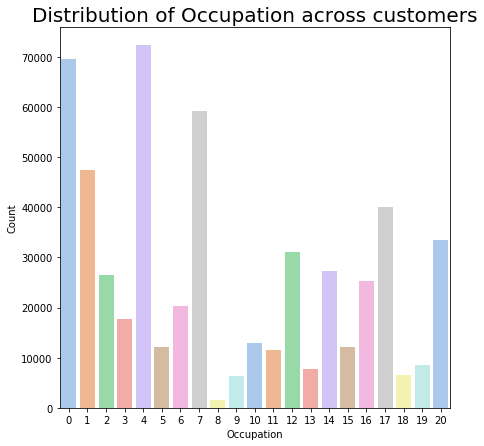

In [200]:
# visualizing the occupation of customers

sns.countplot(df['Occupation'], palette = 'pastel')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [201]:
# checking the dependency of occupation on purchasing power

df[['Occupation', 'Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


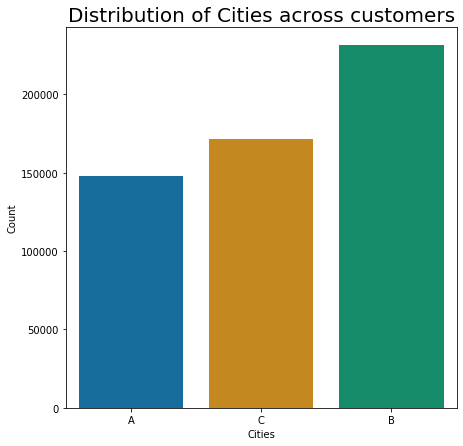

In [202]:
# visulaizing the cities the customers are from

sns.countplot(df['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [203]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [204]:
# checking the dependency of cities where custoer live with the purchasing power

df[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


In [205]:
# we need to label the 4+ to 5 to visualize the stay of customers in a city
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4,})

df['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

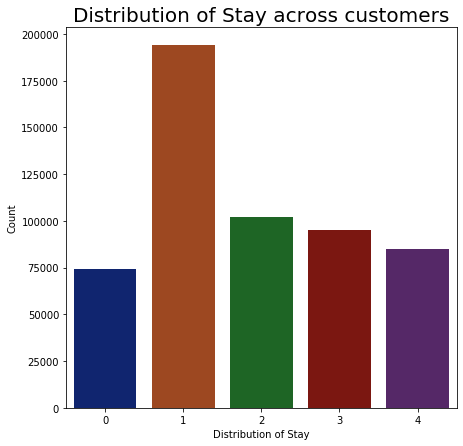

In [206]:
# visualizing the stay in current years


sns.countplot(df['Stay_In_Current_City_Years'], palette = 'dark')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [207]:
 #checking the dependency of stay in purchasing power

df[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4,9275.598872


In [208]:
# visualizing the Marital Status

df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

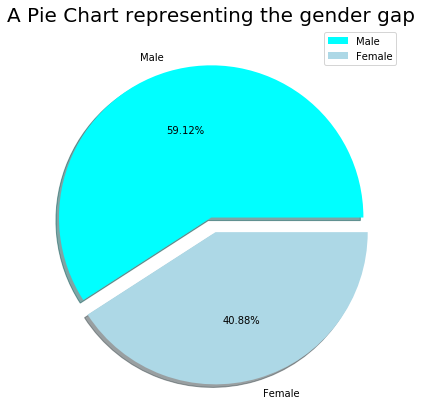

In [209]:
# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [210]:
# checking the dependency of marital status on purchasing power

df[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


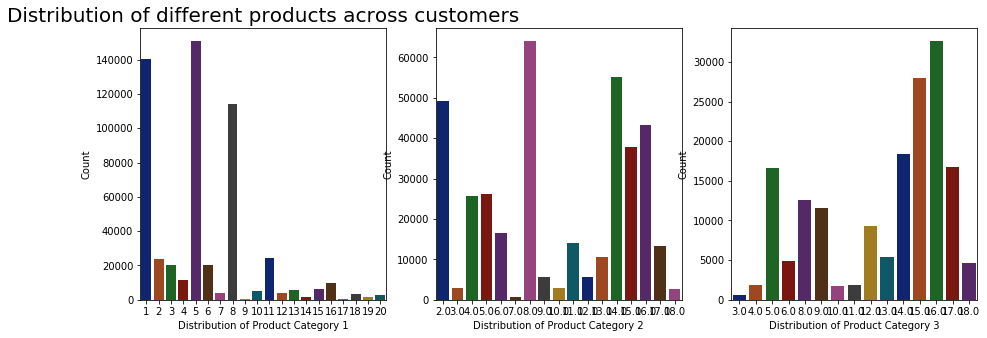

In [211]:
# visualizing the product category 1

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(131)
sns.countplot(df['Product_Category_1'], palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(df['Product_Category_2'], palette = 'dark')
#plt.title('Distribution of product category 2 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(df['Product_Category_3'], palette = 'dark')
#plt.title('Distribution of product category 3 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

In [212]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


In [213]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


In [214]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


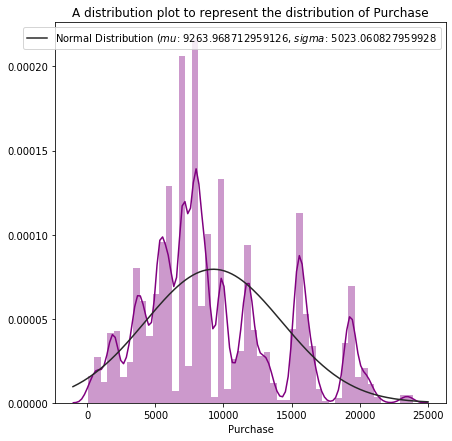

In [215]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(df['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(df['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()



In [224]:
# looking at the columns of the dataset

df.columns
df.shape

(550068, 12)

In [225]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
#User_ID = df['User_ID']
#Product_ID = df['Product_ID']

#df = df.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
#df.shape

In [226]:
# checking if there is any NULL values present in the dataset

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [227]:
# filling the missing values

df['Product_Category_2'].fillna(0, inplace = True)
df['Product_Category_3'].fillna(0, inplace = True)

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [228]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [229]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [230]:
# Convert Categorial data into categorial value by using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 39.9 MB
None


In [231]:
# Checking for null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [232]:
df.shape

(550068, 12)

# Independent and Dependent Variables

In [233]:

X=df.iloc[:,0:-1]
y=df.iloc[:,-1].values.reshape(-1,1)

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("X-train:",X_train.shape)
print("Y-train:",y_train.shape)
print("Y-test:",X_test.shape)
print("Y-test:",y_test.shape)

X-train: (440054, 11)
Y-train: (440054, 1)
Y-test: (110014, 11)
Y-test: (110014, 1)


# Train.csv

In [263]:
test_data = pd.read_csv("C:\\Users\\Admin\\Desktop\\dataset\\Black Friday\\test.csv")
test_data.head(5)
submission = pd.read_csv("C:\\Users\\Admin\\Desktop\\dataset\\Black Friday\\LinearRegSub.csv")
submission['User_ID'] = test1['User_ID']
submission['Product_ID'] = test1['Product_ID']

In [264]:
test_data1=test_data.copy()
test1=test_data


In [265]:
test1.shape

(233599, 11)

In [266]:
# the features with type object in the train data:

objList = test1.select_dtypes(include = "object").columns
print (objList)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [267]:
# Convert Categorial data into categorial value by using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    test1[i] = le.fit_transform(test1[i].astype(str))

print (test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  int32  
 2   Gender                      233599 non-null  int32  
 3   Age                         233599 non-null  int32  
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  int32  
 6   Stay_In_Current_City_Years  233599 non-null  int32  
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int32(5), int64(4)
memory usage: 15.1 MB
None


In [268]:
test1.columns[test1.isna().any()]

Index(['Product_Category_2', 'Product_Category_3'], dtype='object')

In [269]:
test1.Product_Category_2=test1.Product_Category_2.fillna(test1.Product_Category_2.mean())
test1.Product_Category_3=test1.Product_Category_3.fillna(test1.Product_Category_3.mean())

In [271]:
test1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

# Model Fitting and Prediction

# Linear Regression

In [272]:
# predictive analytics
# regression analysis
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE Error:",mse)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

MSE Error: 21311167.06920935
RMSE Error: 4616.401961399089
R2 Score: 0.15428377718915054


In [273]:
#Predict on testing data:
test_pred = model.predict(test1)
test_pred.reshape(-1,1)

array([[12434.72715879],
       [11924.17498503],
       [ 9958.81281211],
       ...,
       [11983.06019875],
       [ 9309.2354646 ],
       [10301.35924849]])

In [274]:
test_pred.shape

(233599, 1)

In [275]:
#a=test_pred
#b=test_data1["User_ID"]
#c=test_data1["Product_ID"]

In [276]:
#submission=pd.DataFrame({"Purchase":a,"User_ID":b,"Product_ID":c})
#submission.to_csv("Liner_Reg.csv",index=False)

submission['Purchase'] = test_pred
submission.to_csv('LinearReg.csv', index=False)

# Decision Tree Regression

In [277]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(X_train,y_train)
#Predict the  response for test dataset
y_pred=DT.predict(X_test)
print(y_pred)

[ 7323.92356688  7237.98333333  7264.92694064 ...  6304.47
  1331.97368421 12488.6302521 ]


In [279]:
print("Mean Absoulet Error:-",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:-",metrics.mean_squared_error(y_test,y_pred))
print(" Root Mean Square Error:-",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absoulet Error:- 2030.4538601736701
Mean Squared Error:- 7467797.506352393
 Root Mean Square Error:- 2732.727118896505


In [280]:
#Predict on testing data:
test_pred = lr.predict(test1)
test_pred.reshape(-1,1)

array([[12434.72715879],
       [11924.17498503],
       [ 9958.81281211],
       ...,
       [11983.06019875],
       [ 9309.2354646 ],
       [10301.35924849]])

In [281]:
#submission=pd.DataFrame({"Purchase":a,"User_ID":b,"Product_ID":c})
submission['Purchase'] = test_pred
submission.to_csv("DecisionTree.csv",index=False)